In [102]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from functools import reduce

In [103]:
# --- PARAMETERS ---

# Pet type they want to adopt
pet_type = "Cat"

# Control
population_density = 2500
cost_of_living = 70000

space_need_cat = 2
space_need_bird = 1
space_need_dog = 7
space_need_lizard = 1
space_need_fish = 0.2

time_need_cat = 2
time_need_bird = 1
time_need_dog = 3
time_need_lizard = 1.5
time_need_fish = 1


# Constants
free_time_std = 2
furniture_percentage = 0.6
space_per_person = 20


# Amount of pets already owned
amount_owned_cat = 0
amount_owned_bird = 0
amount_owned_dog = 0
amount_owned_lizard = 0
amount_owned_fish = 0

# Parameters
household_income = 100000
people_in_household = 2
# amount_already_owned = 0
owner_freetime = 3.5
floor_area = 160
outside_area = 560


In [104]:
# Constant calculation
required_income = cost_of_living + 50000
income_steepness = 0.00005

space_median = -0.00559007*population_density + 26.1558
space_steepness = 0.0000275031*population_density + 0.0702201

time_needed_already = amount_owned_cat*time_need_cat + amount_owned_bird*time_need_bird + amount_owned_dog*time_need_dog + amount_owned_lizard*time_need_lizard + amount_owned_fish*time_need_fish 
space_need_already = amount_owned_cat*space_need_cat + amount_owned_bird*space_need_bird + amount_owned_dog*space_need_dog + amount_owned_lizard*space_need_lizard + amount_owned_fish*space_need_fish 

In [105]:
# INCOME INDEX
def income_index(income):
    return 1 / (1 + math.exp(-income_steepness*(income-required_income)))

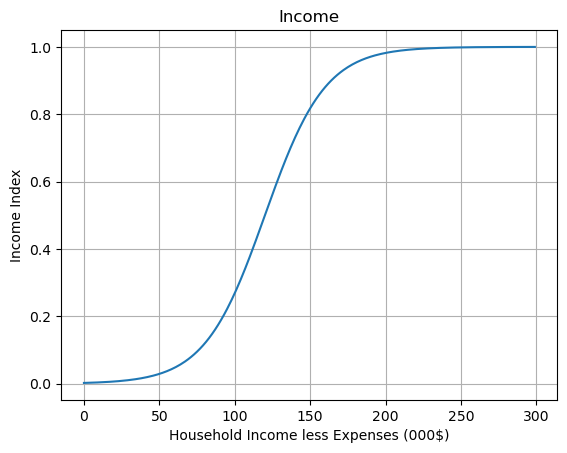

In [106]:
# PLOT
X = np.arange(0,300_000, 1_000)
Y = np.array([income_index(x) for x in X])

plt.grid()
plt.title("Income")
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1_000,Y)

In [107]:
# TIME INDEX
# Cat
def time_index_cat(owner_freetime):
    net_time = owner_freetime - time_needed_already
    z = (net_time - time_need_cat) / free_time_std
    return norm.cdf(z)

# Bird
def time_index_bird(owner_freetime):
    net_time = owner_freetime - time_needed_already
    z = (net_time - time_need_bird) / free_time_std
    return norm.cdf(z)

# Dog
def time_index_dog(owner_freetime):
    net_time = owner_freetime - time_needed_already
    z = (net_time - time_need_dog) / free_time_std
    return norm.cdf(z)

# Lizard
def time_index_lizard(owner_freetime):
    net_time = owner_freetime - time_needed_already
    z = (net_time - time_need_lizard) / free_time_std
    return norm.cdf(z)

# Fish
def time_index_fish(owner_freetime):
    net_time = owner_freetime - time_needed_already
    z = (net_time - time_need_fish) / free_time_std
    return norm.cdf(z)

In [108]:
# SPACE INDEX

# Cat
def get_space_ratio_cat(floor_area, outside_area, people_in_household):
    human_space = furniture_percentage * floor_area + 10*math.log10(outside_area+1) - space_per_person*people_in_household - space_need_already - space_need_cat
    # space = 0.6 * floor_area + 10 * math.log10(outside_area + 1) 
    space_ratio = human_space / space_need_cat

    return space_ratio

def get_space_index_cat(floor_area, outside_area, people_in_household):
    ratio = get_space_ratio_cat(floor_area, outside_area, people_in_household)
    
    return 1/(1+math.exp(-space_steepness*(ratio-space_median)))

# Bird
def get_space_ratio_bird(floor_area, outside_area, people_in_household):
    human_space = furniture_percentage * floor_area + 10*math.log10(outside_area+1) - space_per_person*people_in_household - space_need_already - space_need_bird
    # space = 0.6 * floor_area + 10 * math.log10(outside_area + 1) 
    space_ratio = human_space / space_need_bird

    return space_ratio

def get_space_index_bird(floor_area, outside_area, people_in_household):
    ratio = get_space_ratio_bird(floor_area, outside_area, people_in_household)
    
    return 1/(1+math.exp(-space_steepness*(ratio-space_median)))

# Dog
def get_space_ratio_dog(floor_area, outside_area, people_in_household):
    human_space = furniture_percentage * floor_area + 10*math.log10(outside_area+1) - space_per_person*people_in_household - space_need_already - space_need_dog
    # space = 0.6 * floor_area + 10 * math.log10(outside_area + 1) 
    space_ratio = human_space / space_need_dog

    return space_ratio

def get_space_index_dog(floor_area, outside_area, people_in_household):
    ratio = get_space_ratio_dog(floor_area, outside_area, people_in_household)
    
    return 1/(1+math.exp(-space_steepness*(ratio-space_median)))


# Lizard
def get_space_ratio_lizard(floor_area, outside_area, people_in_household):
    human_space = furniture_percentage * floor_area + 10*math.log10(outside_area+1) - space_per_person*people_in_household - space_need_already - space_need_lizard
    # space = 0.6 * floor_area + 10 * math.log10(outside_area + 1) 
    space_ratio = human_space / space_need_lizard

    return space_ratio

def get_space_index_lizard(floor_area, outside_area, people_in_household):
    ratio = get_space_ratio_lizard(floor_area, outside_area, people_in_household)
    
    return 1/(1+math.exp(-space_steepness*(ratio-space_median)))

# Fish
def get_space_ratio_fish(floor_area, outside_area, people_in_household):
    human_space = furniture_percentage * floor_area + 10*math.log10(outside_area+1) - space_per_person*people_in_household - space_need_already - space_need_fish
    # space = 0.6 * floor_area + 10 * math.log10(outside_area + 1) 
    space_ratio = human_space / space_need_fish

    return space_ratio

def get_space_index_fish(floor_area, outside_area, people_in_household):
    ratio = get_space_ratio_fish(floor_area, outside_area, people_in_household)

    return 1/(1+math.exp(-space_steepness*(ratio-space_median)))

In [109]:
# OUTPUTTING GM

income_index = income_index(household_income)

if pet_type == "Cat":
    time_index = time_index_cat(owner_freetime)
    space_index = get_space_index_cat(floor_area, outside_area, people_in_household)
elif pet_type == "Bird":
    time_index = time_index_bird(owner_freetime)
    space_index = get_space_index_bird(floor_area, outside_area, people_in_household)
elif pet_type == "Dog":
    time_index = time_index_dog(owner_freetime)
    space_index = get_space_index_dog(floor_area, outside_area, people_in_household)
elif pet_type == "Lizard":
    time_index = time_index_lizard(owner_freetime)
    space_index = get_space_index_lizard(floor_area, outside_area, people_in_household)
elif pet_type == "Fish":
    time_index = time_index_fish(owner_freetime)
    space_index = get_space_index_fish(floor_area, outside_area, people_in_household)

print(income_index, time_index, space_index)

PFI = income_index ** (1/3) * time_index ** (1/3) * space_index ** (1/3) 
print(PFI)

0.2689414213699951 0.7733726476231317 0.9814723497365226
0.588809566752596
